In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)
df_.head()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206


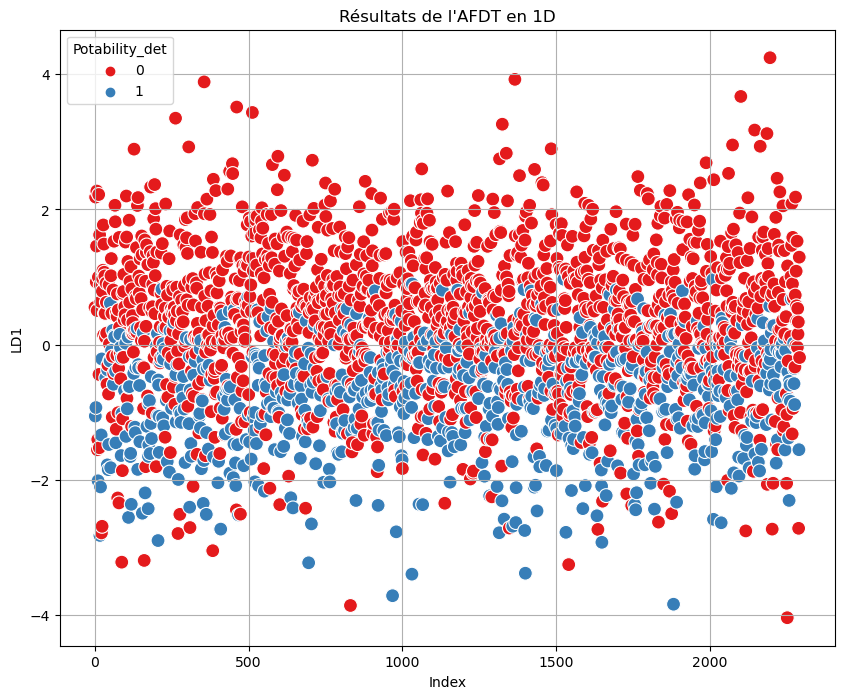

Inertie expliquée par LD1 : 1.00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Charger le dataset
df = pd.read_csv('../../data/data_preprocessed.csv')

# Sélectionner les colonnes pertinentes et la variable cible
X = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)
y = df['Potability_det']

# Vérifier le nombre de classes distinctes
n_classes = y.nunique()
n_features = X.shape[1]
n_components = min(n_features, n_classes - 1)

# Centraliser et standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'AFD (LDA)
lda = LDA(n_components=n_components)
X_lda = lda.fit_transform(X_scaled, y)

# Ajouter les résultats LDA au DataFrame
df_lda = pd.DataFrame(data=X_lda, columns=[f'LD{i+1}' for i in range(n_components)])
df_lda['Potability_det'] = y

# Plotter les résultats de l'AFDT en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_lda.index, y='LD1', hue='Potability_det', data=df_lda, palette='Set1', s=100)
plt.title('Résultats de l\'AFDT en 1D')
plt.xlabel('Index')
plt.ylabel('LD1')
plt.legend(title='Potability_det')
plt.grid()
plt.show()

# Afficher l'inertie expliquée par chaque axe
inertia_explained = lda.explained_variance_ratio_
for i, ratio in enumerate(inertia_explained):
    print(f"Inertie expliquée par LD{i+1} : {ratio:.2f}")


Précision du modèle : 0.73


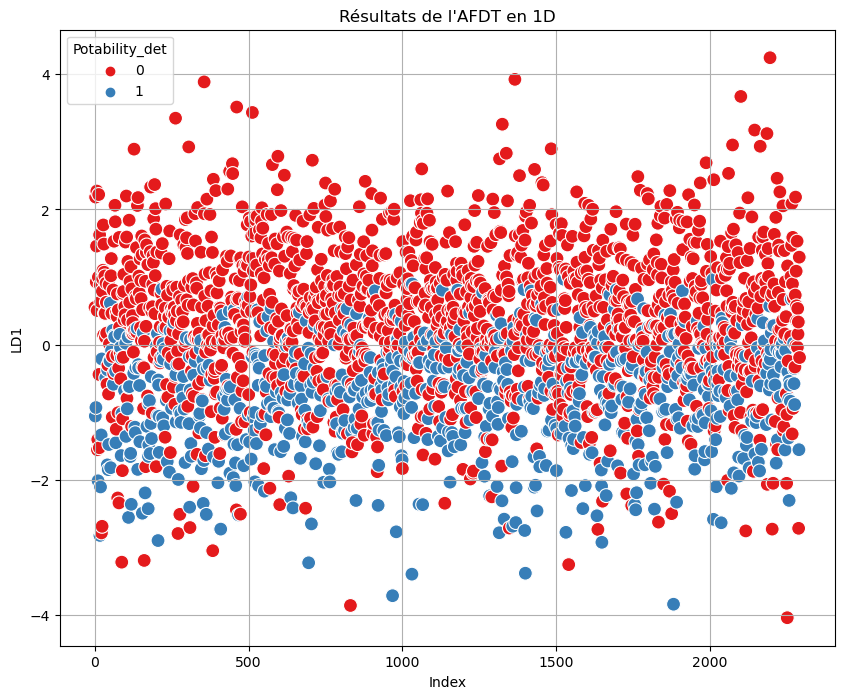

Inertie expliquée par LD1 : 1.00


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

# Charger le dataset
df = pd.read_csv('../../data/data_preprocessed.csv')

# Sélectionner les colonnes pertinentes et la variable cible
X = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)
y = df['Potability_det']

# Vérifier le nombre de classes distinctes
n_classes = y.nunique()
n_features = X.shape[1]
n_components = min(n_features, n_classes - 1)

# Centraliser et standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'AFD (LDA)
lda = LDA(n_components=n_components)
X_lda = lda.fit_transform(X_scaled, y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Ajouter les résultats LDA au DataFrame pour l'ensemble complet
df_lda = pd.DataFrame(data=X_lda, columns=[f'LD{i+1}' for i in range(n_components)])
df_lda['Potability_det'] = y

# Plotter les résultats de l'AFDT en 1D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_lda.index, y='LD1', hue='Potability_det', data=df_lda, palette='Set1', s=100)
plt.title('Résultats de l\'AFDT en 1D')
plt.xlabel('Index')
plt.ylabel('LD1')
plt.legend(title='Potability_det')
plt.grid()
plt.show()

# Afficher l'inertie expliquée par chaque axe
inertia_explained = lda.explained_variance_ratio_
for i, ratio in enumerate(inertia_explained):
    print(f"Inertie expliquée par LD{i+1} : {ratio:.2f}")


In [14]:
import pandas as pd
from scipy.stats import shapiro

# Charger le dataset

# Initialisation d'un dictionnaire pour stocker les résultats du test de Shapiro
shapiro_results = {}

# Effectuer le test de Shapiro pour chaque colonne numérique
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    stat, p_value = shapiro(df[column])
    shapiro_results[column] = {'Statistic': stat, 'p-value': p_value}

# Convertir les résultats en DataFrame pour une meilleure lisibilité
shapiro_results_df = pd.DataFrame(shapiro_results).T

# Identifier les variables qui suivent une distribution normale
normal_variables = shapiro_results_df[shapiro_results_df['p-value'] > 0.05].index.tolist()

# Afficher les résultats
print("Résultats du test de Shapiro-Wilk :")
print(shapiro_results_df)
print("\nVariables suivant une distribution normale (p-value > 0.05) :")
print(normal_variables)


Résultats du test de Shapiro-Wilk :
                 Statistic       p-value
Unnamed: 0        0.954875  4.698207e-26
ph                0.978653  4.806283e-18
Hardness          0.997147  2.975335e-04
Solids            0.983021  6.572156e-16
Chloramines       0.996637  5.805928e-05
Sulfate           0.962381  5.799839e-24
Conductivity      0.991314  1.695482e-10
Organic_carbon    0.999309  5.753063e-01
Trihalomethanes   0.997436  7.862383e-04
Turbidity         0.999527  8.769083e-01
Potability        0.618895  0.000000e+00
Potability_det    0.596832  0.000000e+00

Variables suivant une distribution normale (p-value > 0.05) :
['Organic_carbon', 'Turbidity']


In [15]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Charger le dataset
df = pd.read_csv('../../data/data_preprocessed.csv')

# Sélectionner les colonnes pertinentes
df_ = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)
features = ['Organic_carbon', 'Turbidity']
X = df[features]
y = df['Potability_det']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et ajuster le modèle LDA
lda = LDA()
lda.fit(X_train_scaled, y_train)

# Faire des prédictions
y_pred = lda.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)

# Afficher les résultats
print(f'Accuracy of LDA model: {accuracy:.2f}')


Accuracy of LDA model: 0.64


Accuracy of LDA model: 0.64


C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Exception: ('No corresponding label found for ', 0)

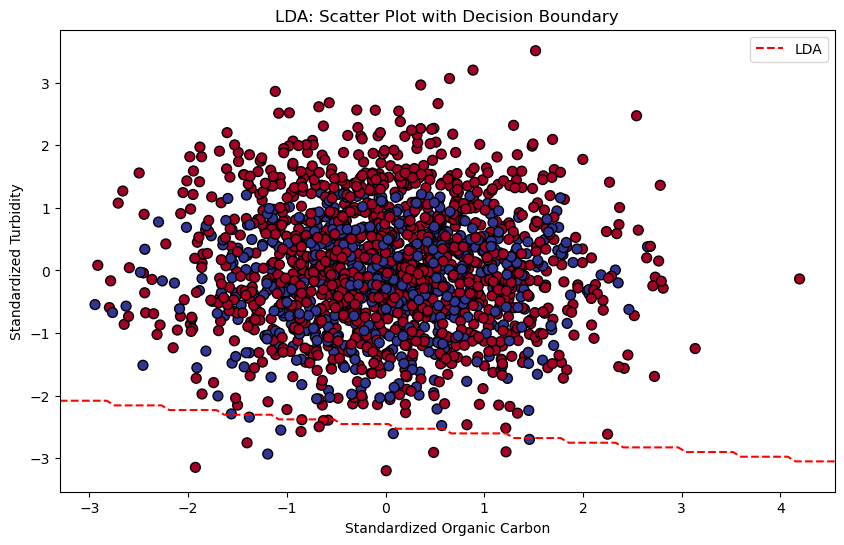

In [27]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from utils import add_decision_boundary

# Charger le dataset
df = pd.read_csv('../../data/data_preprocessed.csv')

# Sélectionner les colonnes pertinentes
df_ = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)
features = ['Organic_carbon', 'Turbidity']
X = df[features]
y = df['Potability_det']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et ajuster le modèle LDA
lda = LDA()
lda.fit(X_train_scaled, y_train)

# Faire des prédictions
y_pred = lda.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA model: {accuracy:.2f}')

# Visualisation du scatterplot avec la frontière de décision
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=50)
plt.title('LDA: Scatter Plot with Decision Boundary')
plt.xlabel('Standardized Organic Carbon')
plt.ylabel('Standardized Turbidity')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
add_decision_boundary(lda, label='LDA', color='red')

plt.show()


In [34]:
X

,Organic_carbon,Turbidity
0,11.502316,2.994259
1,15.056064,3.250022
2,20.314617,4.867287
3,17.746264,4.279082
4,17.263576,5.082206
...,...,...
2288,10.075598,4.724457
2289,13.300688,5.771715
2290,15.343316,3.076214
2291,19.116022,3.841222


C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wi

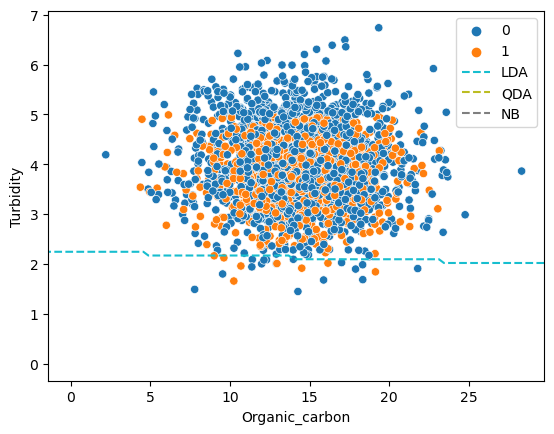

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Supposons que `features` contient toutes les colonnes nécessaires pour l'analyse
features = ['Organic_carbon', 'Turbidity']

df = df[['Organic_carbon', 'Turbidity', 'Potability_det']]

models = [
    (LinearDiscriminantAnalysis, "LDA"),
    (QuadraticDiscriminantAnalysis, "QDA"),
    (GaussianNB, "NB"),
]

def validation_errors(df, models):
    y = df['Potability_det']
    X = df.drop(['Potability_det'], axis=1)
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc

def add_decision_boundaries(df, models):
    colors = sns.color_palette()
    for model, name in models:
        y = df['Potability_det']
        X = df.drop(['Potability_det'], axis=1)
        cls = model()
        cls.fit(X, y)
        # Assuming `add_decision_boundary` is defined somewhere else correctly
        add_decision_boundary(cls, label=name, color=colors.pop(), region=False)

X = df[features]
y = df['Potability_det']

# Plotting scatter plot
sns.scatterplot(x="Organic_carbon", y="Turbidity", data=df, hue="Potability_det")

# Adding decision boundaries
add_decision_boundaries(df, models)

plt.show()


In [60]:
df = df[['Organic_carbon', 'Turbidity', 'Potability_det']]
df

,Organic_carbon,Turbidity,Potability_det
0,11.502316,2.994259,0
1,15.056064,3.250022,1
2,20.314617,4.867287,0
3,17.746264,4.279082,1
4,17.263576,5.082206,0
...,...,...,...
2288,10.075598,4.724457,0
2289,13.300688,5.771715,0
2290,15.343316,3.076214,1
2291,19.116022,3.841222,0


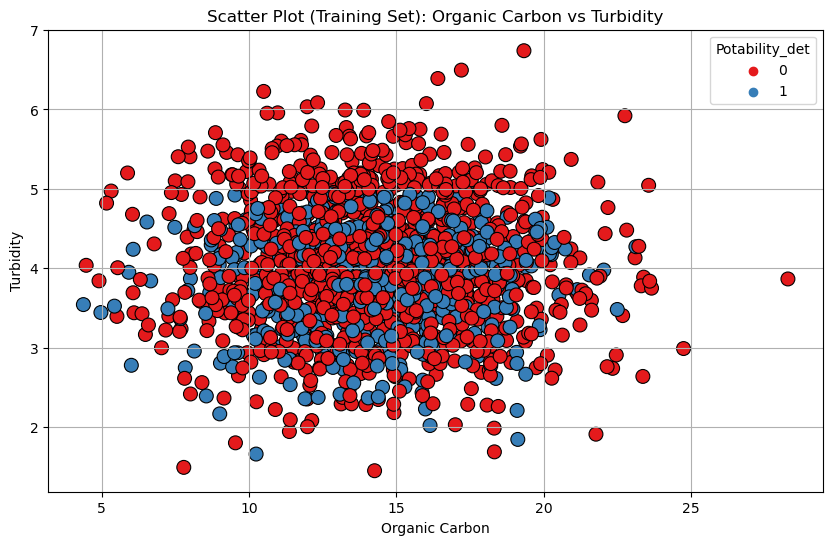

C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


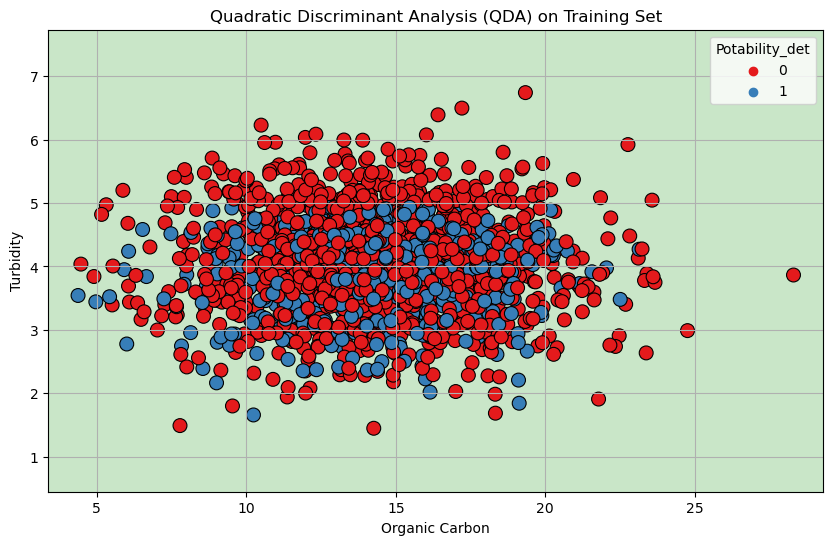

Accuracy of QDA on test set: 0.64


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
import numpy as np

# Charger le dataset
df = pd.read_csv('../../data/data_preprocessed.csv')

# Sélectionner les colonnes pertinentes
df = df[['Organic_carbon', 'Turbidity', 'Potability_det']]

# Diviser les données en ensemble d'apprentissage et ensemble de test
X = df[['Organic_carbon', 'Turbidity']]
y = df['Potability_det']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Affichage du scatter plot avec hue = Potability_det pour l'ensemble d'apprentissage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Organic_carbon', y='Turbidity', hue=y_train, data=X_train.join(y_train), palette='Set1', edgecolor='k', s=100)
plt.title('Scatter Plot (Training Set): Organic Carbon vs Turbidity')
plt.xlabel('Organic Carbon')
plt.ylabel('Turbidity')
plt.legend(title='Potability_det', loc='upper right')
plt.grid(True)
plt.show()

# Application de l'analyse discriminante quadratique (QDA) sur l'ensemble d'apprentissage
qda = QDA()
qda.fit(X_train, y_train)

# Plot decision boundary for QDA on training set
x_min, x_max = X_train['Organic_carbon'].min() - 1, X_train['Organic_carbon'].max() + 1
y_min, y_max = X_train['Turbidity'].min() - 1, X_train['Turbidity'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
sns.scatterplot(x='Organic_carbon', y='Turbidity', hue=y_train, data=X_train.join(y_train), palette='Set1', edgecolor='k', s=100)
plt.title('Quadratic Discriminant Analysis (QDA) on Training Set')
plt.xlabel('Organic Carbon')
plt.ylabel('Turbidity')
plt.legend(title='Potability_det', loc='upper right')
plt.grid(True)
plt.show()

# Évaluation du modèle sur l'ensemble de test
accuracy = qda.score(X_test, y_test)
print(f'Accuracy of QDA on test set: {accuracy:.2f}')
